For our project we used three different datasets that align with our values to define and measure "bestness". 

Our first dataset covers the crime of every neighborhood within pittsburgh, using data taken from the [wprdc arrest dataset ](https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f) from 1998 to 2023. We consider only arrests in the latest three years (2020-2023). We only count the number of offenses and do not factor in severity, and scale by total population of each neighborhood. We consider this metric in our overall determination of the best neighborhood, as crime and saftey is an important aspect of any neighborhood. Obviously, People want to feel safe in their own homes and neighborhoods without fear of violent or property crime.

We also consider general life expectancy for each neighborhood, as this one metric can be telling for multiple other metrics such as health and safety. A lower life expectancy may indicate a lack of safety, proper medical care, a high stress environment, or even lack of accessible and nutrient-rich food in the area. We use data from [median age at death](https://data.wprdc.org/dataset/median-age-death/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2) dataset, which measure the number of deaths in the area and the median age of each of them over the years 2011-2015.  

Our third dataset is diversity. Ichose this because I thought it would be more fun and interesting. This isn't like crime rate where the numbers represent something definite like the lower the crime rate the better. I also wanted to look at something a little more interpretive, so depending on your own opinion, you can determine whether or not a neighborhood with a higher diversity proportion is good or bad. For my metric, I calculated a diversity score using the Simpson's Index formula. This is a formula used to measure the diversity of a population. It quantifies the likelihood that two individuals randomly selected from a dataset belong to different groups. I chose this formula also because it includes both the count of the different groups in the data I chose and how evenly populations are distributed among them. Whereas if you just add up the raw population counts, "diversity" can be misinterpreted completely. In conclusion, the metric is a score between 0 and 1, the higher the metric the more evenly the population is distributed across the given racial or ethnic groups, and vice versa. 



In [22]:
!pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


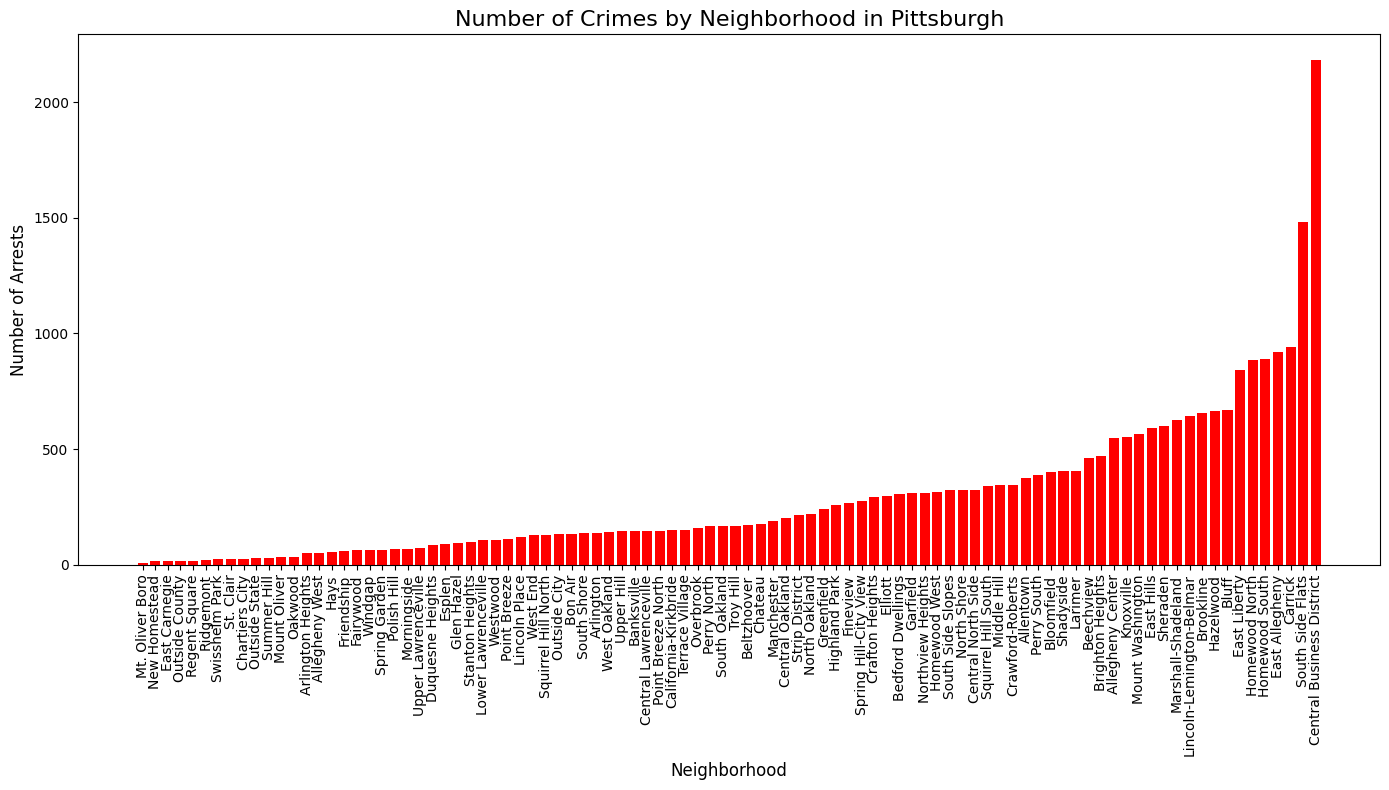

In [23]:
data = pd.read_csv('countofcrime.csv')

plt.figure(figsize=(14, 8))
plt.bar(data['Row Labels'], data['Count of OFFENSES'], color='red')

plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Arrests', fontsize=12)
plt.title('Number of Crimes by Neighborhood in Pittsburgh', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  
plt.tight_layout() 


plt.show()

We see that many neighborhoods have a relatively low number of arrests, an almost exponential growth to neighborhoods like south side flats and central business district with a very high arrest rate. An important note is that this is not scaled by the population of each neighborhood. But south side flats and the central business district both have relatively lower population according to a [census](https://data.wprdc.org/dataset/pgh/resource/b7156251-6036-4b68-ad2a-95566c84343e) taken in 2010, though there may have been a large influx of people since then. 

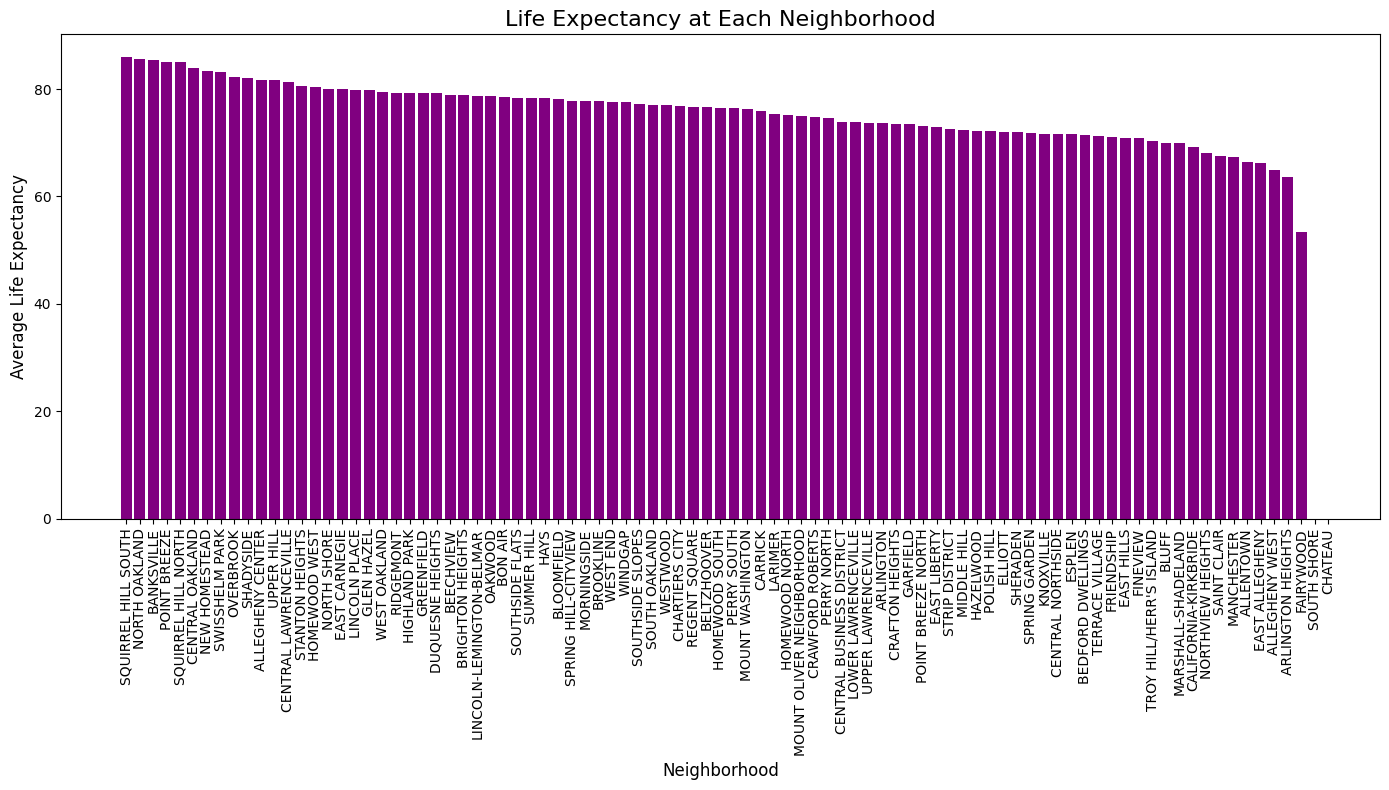

In [25]:
data = pd.read_csv('datanage.csv')

plt.figure(figsize=(14, 8))
plt.bar(data['NEIGHBORHOOD'], data['TOTAL MD AGE AT DEATH'], color='purple')

plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Life Expectancy', fontsize=12)
plt.title('Life Expectancy at Each Neighborhood', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  
plt.tight_layout() 


plt.show()

Regarding the lack of bars for south shore and chateau: chateau had no recorded deaths in this time period, and south shore's median age at death was never calculated in the dataset. Otherwise, most neighborhoods had relatively high life expectancy even according to the national average (77 years) except for fairywood -- which had a low number of recorded deaths in that time period (so perhaps there were unusal circumstances). 

In [ ]:
df = pd.read_csv('Race.csv')

# Isolating the columns needed
race_columns = [
    "Estimate; Total: - White alone",
    "Estimate; Total: - Black or African American alone",
    "Estimate; Total: - American Indian and Alaska Native alone",
    "Estimate; Total: - Asian alone",
    "Estimate; Total: - Native Hawaiian and Other Pacific Islander a",
    "Estimate; Total: - Some other race alone",
    "Estimate; Total: - Two or more races:"
]
total_population_col = "Estimate; Total:" 

# Creating a function to calculate Simpson's Diversity Index
def calculate_simpsons_index(row, race_columns, total_population_col):
    # If the popualation is 0, return NaN
    if row[total_population_col] == 0:
        return float('nan')
    # calculates the proportion of the population for each racial/ethnic group in the neighborhood
    # FORMULA: p(i) 
    # [row[col] = for each column in race_columns, divide the population count by the total population
    proportions = [row[col] / row[total_population_col] for col in race_columns]

    # FORMULA: p^2(i) squares each proportion
    #Subtract the sum from 1 to calculate the index/diversity score
    # Subtracting from 1 gives the probability that two individuals belong to different groups, which shows diversity distribution
    simpsons_index = 1 - sum(p ** 2 for p in proportions)
    return simpsons_index

# Apply the function on each neighborhood
df['Simpsons Index'] = df.apply(
    calculate_simpsons_index, axis=1, race_columns=race_columns, total_population_col=total_population_col
)

# Use only Neighborhood and Simpson's Index for visualization
simpsons_data = df[['Neighborhood', 'Simpsons Index']].sort_values(by='Simpsons Index', ascending=False)

![formula](Formula.png)

<h3> Formula Breakdown</h3>



<ul>
  <li>D = Diversity Index (ranges between 0 and 1)</li>
  <li>n = The total number of groups given the data (in this case the the length of race_columns)</li>
  <li>p(i) = the proportion of the population in group (race) i , to calculate this you divide population of group i by the total population</li>
</ul>

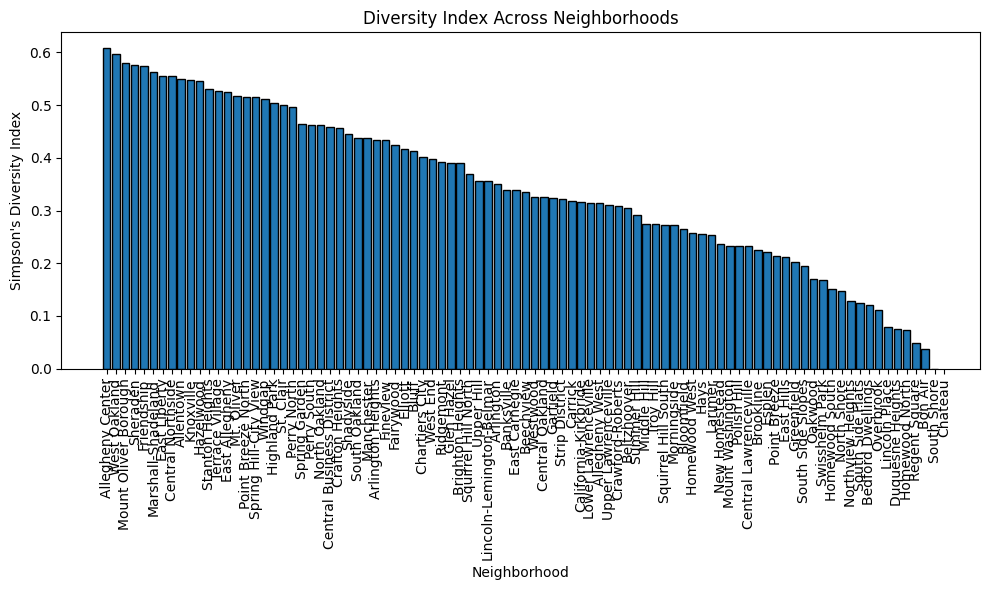

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(simpsons_data['Neighborhood'], simpsons_data['Simpsons Index'], edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Simpson\'s Diversity Index')
plt.title('Diversity Index Across Neighborhoods')
plt.tight_layout()
plt.show()

Allegheny Center has the highest diversity index, which proves that its population is more evenly distributed across different racial and ethnic groups compared to other neighborhoods. As mentioned before, depending on your perspective, you can determine whether a higher diversity score is good or bad. For example, a higher diversity score might mean inclusivity and opportunities to interact with people from a variety of backgrounds, breaking traditional barriers. On the other hand, a lower diversity score could mean a strong community cohesion. For me, I value a higher diversity score because I enjoy meeting people with different experiences.

In conclusion, we both agree that Mount Oliver is the best neighborhood. Because it was one of the only neighborhoods that ranked high in all of our datasets. We don't have a visual for this because we weighed evertything the same and it was pretty easy to point out the neighborhood that was ranked high in all the datasets. It was ranked third in highest diversity score, had the lowest crime rate, and has a decently high life expectancy score. 